**SALES ANALYSIS**

In [2]:
import pandas as pd
import os

**Merge the 12 months of sales data into a single CSV file**

In [5]:
files = [file for file in os.listdir('./sales_data') if file.endswith('.csv')]

all_months_data = pd.DataFrame()

for file in files:
    try:
        df = pd.read_csv(f'./sales_data/{file}', encoding='ISO-8859-1')
        all_months_data = pd.concat([all_months_data, df], ignore_index=True)
        print(f"Loaded: {file}")
    except UnicodeDecodeError as e:
        print(f"Unicode error in {file}: {e}")
    except Exception as e:
        print(f"Other error in {file}: {e}")
        
all_months_data.to_csv('all_data.csv', index=False)


Loaded: Sales_April_2019.csv
Loaded: Sales_August_2019.csv
Loaded: Sales_December_2019.csv
Other error in Sales_February_2019.csv: Error tokenizing data. C error: Expected 6 fields in line 8948, saw 8

Loaded: Sales_January_2019.csv
Loaded: Sales_July_2019.csv
Loaded: Sales_June_2019.csv
Loaded: Sales_March_2019.csv
Loaded: Sales_May_2019.csv
Loaded: Sales_November_2019.csv
Loaded: Sales_October_2019.csv
Loaded: Sales_September_2019.csv


**Read in updated dataframe**

In [7]:
all_data = pd.read_csv('all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
174809,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
174810,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
174811,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
174812,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


**cleaning up the data**

In [9]:
all_data_cleaned = all_data.dropna(how='all')
## creating a month column
## Clean the Order Data column by removing any rows with invalid dates
all_data_cleaned = all_data_cleaned[all_data_cleaned['Order Date'].str.match(r'\d{2}/\d{2}/\d{2}.*').fillna(False)]

all_data_cleaned['Month'] = all_data_cleaned['Order Date'].str[0:2]

all_data_cleaned['Month'] = pd.to_numeric(all_data_cleaned['Month'], errors='coerce')
all_data_cleaned = all_data_cleaned.dropna(subset=['Month'])
all_data_cleaned['Month'] = all_data_cleaned['Month'].astype('int32')

all_data_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
174809,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
174810,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
174811,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
174812,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [12]:
months_list = all_data_cleaned['Month'].unique()
for i in months_list:
    print(i, len(all_data_cleaned[all_data_cleaned['Month'] == i]))

4 18279
5 16566
8 11961
9 11621
12 24984
1 9709
2 6
7 14293
6 13554
3 15136
11 17573
10 20282


**adding a sales column**

In [14]:
all_data_cleaned['Sales'] = all_data_cleaned['Quantity Ordered'].astype('int32') * all_data_cleaned['Price Each'].astype('float64')

all_data_cleaned[['Product', 'Quantity Ordered', 'Price Each', 'Sales']]

,Product,Quantity Ordered,Price Each,Sales
0,USB-C Charging Cable,2,11.95,23.90
2,Bose SoundSport Headphones,1,99.99,99.99
3,Google Phone,1,600,600.00
4,Wired Headphones,1,11.99,11.99
5,Wired Headphones,1,11.99,11.99
...,...,...,...,...
174809,AAA Batteries (4-pack),3,2.99,8.97
174810,iPhone,1,700,700.00
174811,iPhone,1,700,700.00
174812,34in Ultrawide Monitor,1,379.99,379.99


**adding a city column using the .apply() method**

In [15]:
all_data_cleaned['State'] = all_data_cleaned['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]

all_data_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,MA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,CA


**Question 1: What was the best month for sales? How much was earned that month?**

In [19]:
list_monthly_sales = []

month_and_sales = pd.DataFrame() ## creating a dataframe

month_and_sales['Month'] = all_data_cleaned['Month'].unique() ## listing all the months

month_and_sales['Total Sales'] = [sum(all_data_cleaned['Sales'][all_data_cleaned['Month'] == i].astype('float64')) for i in month_and_sales['Month']] ## finding the sum of sales per month

month_and_sales['Quantity Oredered'] = [sum(all_data_cleaned['Quantity Ordered'][all_data_cleaned['Month'] == i].astype('int32')) for i in month_and_sales['Month']]

results = month_and_sales.groupby('Month').sum()

results

,Total Sales,Quantity Oredered
Month,,
1,1822256.73,10903
2,1748.68,6
3,2803892.88,16987
4,3390670.24,20558
5,3152606.75,18667
6,2577802.26,15253
7,2647775.76,16072
8,2244467.88,13448
9,2097560.13,13109


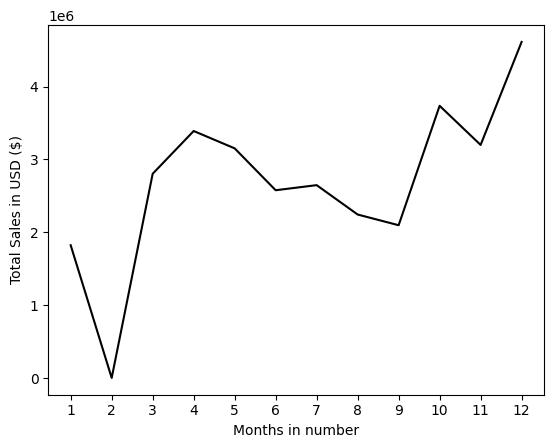

In [20]:
import matplotlib.pyplot as plt

months = range(1, 13)

plt.plot(months, results['Total Sales'], 'black')
plt.xlabel('Months in number')
plt.ylabel('Total Sales in USD ($)')
plt.xticks(months)

plt.show()

**Question 2: What city has the highest amount of sales?**

In [24]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data_cleaned['City'] = all_data_cleaned['Purchase Address'].str.split(',').str[1]

all_data_cleaned['City(State)'] = all_data_cleaned['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


city_and_sales = pd.DataFrame()
city_and_sales['City'] = all_data_cleaned['City(State)'].unique()
city_and_sales['Total Sales'] = [sum(all_data_cleaned['Sales'][all_data_cleaned['City(State)'] == i]) for i in city_and_sales['City']]

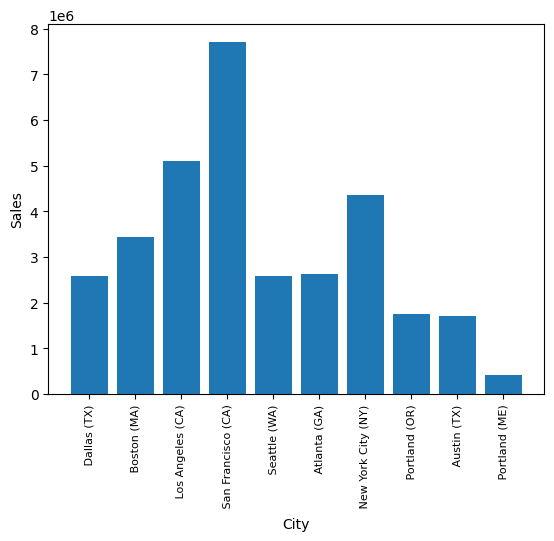

In [25]:
import matplotlib.pyplot as plt

cities = city_and_sales['City']

plt.bar(cities, city_and_sales['Total Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

**Question 3: What time should we display advertisements to maximise likelihood of customer's buying product?**

In [26]:
all_data_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City,City(State)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,TX,Dallas,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,MA,Boston,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA,Los Angeles,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA,Los Angeles,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,CA,Los Angeles,Los Angeles (CA)


In [28]:
all_data_cleaned['Order Date'] = pd.to_datetime(all_data_cleaned['Order Date'])

all_data_cleaned['Hour'] = all_data_cleaned['Order Date'].dt.hour
all_data_cleaned['Minute'] = all_data_cleaned['Order Date'].dt.minute
all_data_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City,City(State),Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,TX,Dallas,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,MA,Boston,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA,Los Angeles,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA,Los Angeles,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,CA,Los Angeles,Los Angeles (CA),9,27


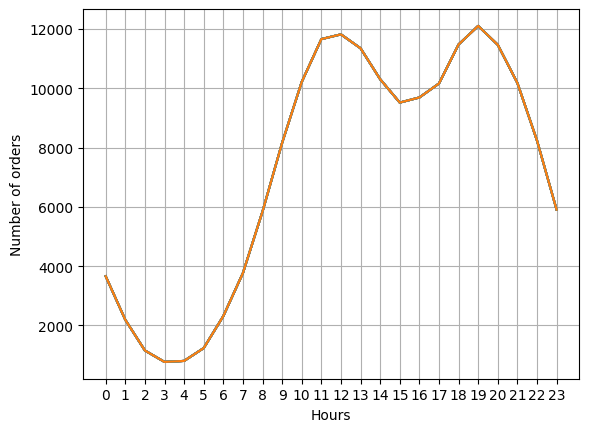

In [30]:
hours = [hour for hour, df in all_data_cleaned.groupby('Hour')]

plt.plot(hours, all_data_cleaned.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

**Question 4: What products are most often sold together?**

In [32]:
df = all_data_cleaned[all_data_cleaned['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df['Grouped']

C:\Users\user\AppData\Local\Temp\ipykernel_4152\683312332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


3                             Google Phone,Wired Headphones
18                        Google Phone,USB-C Charging Cable
30        Bose SoundSport Headphones,Bose SoundSport Hea...
32                      AAA Batteries (4-pack),Google Phone
119           Lightning Charging Cable,USB-C Charging Cable
                                ...                        
174745    Apple Airpods Headphones,Apple Airpods Headphones
174747    iPhone,Lightning Charging Cable,Lightning Char...
174755         34in Ultrawide Monitor,AA Batteries (4-pack)
174767              Wired Headphones,AAA Batteries (4-pack)
174805                    Google Phone,USB-C Charging Cable
Name: Grouped, Length: 6685, dtype: object

In [33]:
from itertools import combinations
from collections import Counter


count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 955
('Google Phone', 'USB-C Charging Cable') 911
('iPhone', 'Wired Headphones') 415
('Google Phone', 'Wired Headphones') 386
('Vareebadd Phone', 'USB-C Charging Cable') 340
('iPhone', 'Apple Airpods Headphones') 337
('Google Phone', 'Bose SoundSport Headphones') 203
('USB-C Charging Cable', 'Wired Headphones') 152
('Vareebadd Phone', 'Wired Headphones') 131
('Lightning Charging Cable', 'Wired Headphones') 87


**Question 5: What product sold the most? Why do you think it sold the most?**

In [34]:
all_data_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City,City(State),Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,TX,Dallas,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,MA,Boston,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA,Los Angeles,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA,Los Angeles,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,CA,Los Angeles,Los Angeles (CA),9,27


C:\Users\user\AppData\Local\Temp\ipykernel_4152\23108809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['Quantity Ordered'] = products['Quantity Ordered'].astype('int32')


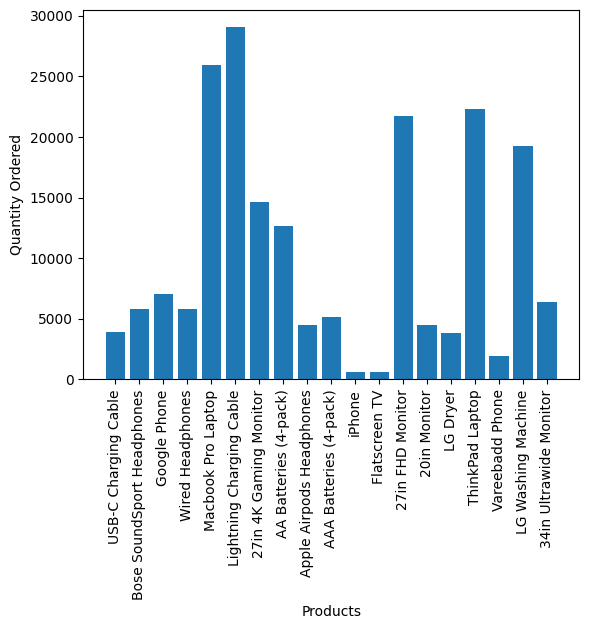

In [35]:
products = all_data_cleaned[['Product', 'Quantity Ordered']]
products['Quantity Ordered'] = products['Quantity Ordered'].astype('int32')

product = products.groupby('Product').sum()

product['Product'] = products['Product'].unique()

plt.bar(product['Product'], product['Quantity Ordered'])

plt.xticks(product['Product'], rotation='vertical')

plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4152\1901550061.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(product['Product'], rotation='vertical')
C:\Users\user\AppData\Local\Temp\ipykernel_4152\1901550061.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


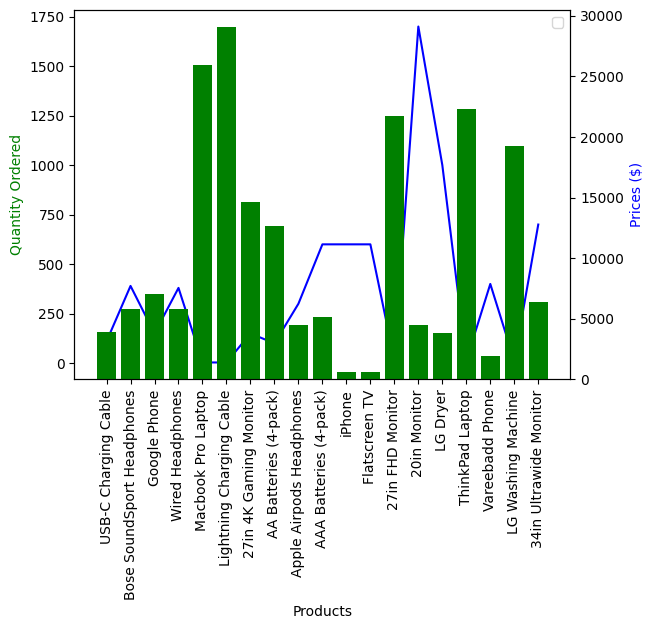

In [36]:
all_data_cleaned['Price Each'] = pd.to_numeric(all_data_cleaned['Price Each'], errors='coerce')

prices = all_data_cleaned.groupby('Product')['Price Each'].mean()

fig, ax = plt.subplots()
ax1 = ax.twinx()
ax1.bar(product['Product'], product['Quantity Ordered'], color='g')
ax.plot(product['Product'], prices, 'b')

ax.set_xlabel('Products')
ax.set_ylabel('Quantity Ordered', color='g')
ax1.set_ylabel('Prices ($)', color='b')
ax.set_xticklabels(product['Product'], rotation='vertical')
ax.legend()

plt.show()